# 프로젝트 개요
- 강의명 : (산대특)_공공데이터 활용 빅데이터 분석 및 시각화 전문가 과정 육성
- 교과목명 : 빅데이터 시스템 구축
- 프로젝트 주제 : PySpark 설치 및 Spark를 활용한 머신러닝 개발
- 프로젝트 마감일 : 2022년 11월 17일 목요일
- 수강생명 : 홍길동

## 옵션
- 한글 서체 설치

In [ ]:
#한글 서체 설치 # 생략 가능
#실행하려면 다음 코드 앞의 #를 삭제한 후 실행해주세요. 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,968 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
#설치 후 런타임 > 런타임 다시 시작을 해줘야 합니다. 
#이 과정이 싫다면 건너 뛰어도 상관없습니다. 실행하려면 다음 코드 앞의 #을 삭제해주세요.
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 평가 1. PySpark 설치 (20점)
- PySpark를 설치하는 코드를 작성한다. 
  + 조건 1. JAVA 설치
  + 조건 2. Spark 설치 (Spark 3.2.0 버전)
    * 참조 : https://spark.apache.org/downloads.html
  + 조건 3. 환경변수
  + 조건 4. PySpark 라이브러리 불러오기

In [ ]:
# JAVA 설치
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# 스파크 다운로드
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

# 압축파일 해제
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.2.0-bin-hadoop3.2'

- PySpark 설치

In [ ]:
!pip install pyspark==3.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 198 kB 68.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805913 sha256=9ec90ab99b79a55764146fd46a17cad52b466269cce1ec482c8fb71a9fd3ebe4
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
import pyspark 
print(pyspark.__version__)

3.2.0


## 평가 2. Spark 세션 생성 작성 (10점)
- Spark 세션을 생성하는 코드를 작성한다. 
  + 조건 1. master: local[1]
  + 조건 2. appName: human
  + 조건 3. spark 버전 확인

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[1]').appName('human').getOrCreate()
print(spark.version)

3.2.0


## 평가 3. 구글 드라이브 연동 및 파일 확인 (10점)
- 구글 드라이브에 data 폴더와 연동하여 실제 데이터가 존재하는지 출력한다. 
  + 처음 4개만 출력한다. 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/2022/human/산대특/평가/7차시 빅데이터 시스템 구축/data/"

# 코드
flights = spark.read.csv(DATA_PATH + 'flights.csv',
                         sep=',',
                         header=True,
                         inferSchema=True,
                         nullValue='NA')

print(f'데이터 행의 갯수는 {flights.count()} 이다.')
flights.show(4)

데이터 행의 갯수는 50000 이다.
+---+---+---+-------+------+---+----+------+--------+-----+
|mon|dom|dow|carrier|flight|org|mile|depart|duration|delay|
+---+---+---+-------+------+---+----+------+--------+-----+
| 11| 20|  6|     US|    19|JFK|2153|  9.48|     351| null|
|  0| 22|  2|     UA|  1107|ORD| 316| 16.33|      82|   30|
|  2| 20|  4|     UA|   226|SFO| 337|  6.17|      82|   -8|
|  9| 13|  1|     AA|   419|ORD|1236| 10.33|     195|   -5|
+---+---+---+-------+------+---+----+------+--------+-----+
only showing top 4 rows



- 컬럼명 소개는 다음과 같다. 
  + mon — month (integer between 1 and 12)
  + dom — day of month (integer between 1 and 31)
  + dow — day of week (integer; 1 = Monday and 7 = Sunday)
  + carrier — carrier (IATA code)
  + flight — flight number
  + org — origin airport (IATA code)
  + mile — distance (miles)
  + depart — departure time (decimal hour)
  + duration — expected duration (minutes)
  + delay — delay (minutes)
- ITTA Code 주소
  + https://en.wikipedia.org/wiki/List_of_airline_codes

## 평가 4. 데이터 시각화 (20점)
- 주어진 스파크 데이터를 pandas로 변환한 후, 시각화를 작성한다. 
- 종속변수는 duration이고, 나머지는 모두 독립변수로 처리한다. 
- 그래프 종류는 다음과 같다. 각 5점부여 
  + 산점도 1개
  + 박스플롯 1개
  + 히스토그램 1개
  + 막대그래프 (count plot) 1개

In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

data = flights.toPandas()
print(data.shape) # (50000, 10)

# 데이터 전처리 - 1. 결측치 제거
data2 = data.dropna(axis = 0)
print(data2.shape) # (47022, 10)

(50000, 10)
(47022, 10)


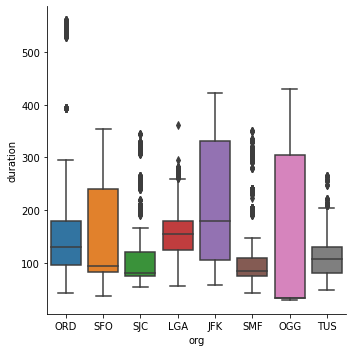

In [ ]:
# 박스플롯 예
sns.catplot(data=data2, x="org", y="duration", kind='box')
plt.show()

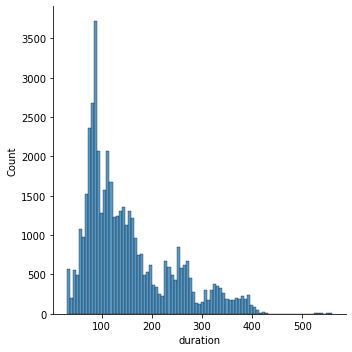

In [ ]:
# 히스토그램 예
sns.displot(data=data2, x="duration")
plt.show()

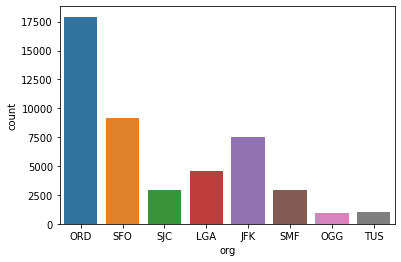

In [ ]:
# 막대그래프 (count plot) 예
sns.countplot(data=data2, x="org")
plt.show()

## 평가 5. Spark Feature Enginnering (30점)
- flgiths 데이터를 활용하여 각 조건에 맞추어 Feature Engineering을 진행한다. 

- 조건 1. 결측치 및 컬럼 제거 (5점)
  + 결측치 제거
  + flight 컬럼 제거

In [ ]:
print((flights.count(), len(flights.columns)))

(50000, 10)


In [ ]:
flights2 = flights.dropna()
print((flights2.count(), len(flights2.columns)))

(47022, 10)


In [ ]:
flights3 = flights2.drop('flight')
print((flights3.count(), len(flights3.columns)))

(47022, 9)


- 조건 2. km 컬럼 생성 (5점)
  + miles로 된 컬럼을 km으로 변경하도록 한다. 대신, mile 컬럼은 제거한다. 

In [ ]:
from pyspark.sql.functions import round

flights4 = flights3.withColumn('km', round(flights3.mile * 1.60934, 0)).drop('mile')
print((flights4.count(), len(flights4.columns)))
print(flights4.show(4))

(47022, 9)
+---+---+---+-------+---+------+--------+-----+------+
|mon|dom|dow|carrier|org|depart|duration|delay|    km|
+---+---+---+-------+---+------+--------+-----+------+
|  0| 22|  2|     UA|ORD| 16.33|      82|   30| 509.0|
|  2| 20|  4|     UA|SFO|  6.17|      82|   -8| 542.0|
|  9| 13|  1|     AA|ORD| 10.33|     195|   -5|1989.0|
|  5|  2|  1|     UA|SFO|  7.98|     102|    2| 885.0|
+---+---+---+-------+---+------+--------+-----+------+
only showing top 4 rows

None


- 조건 3. 원핫인코딩 (10점)
  + carrier와 org 컬럼을 모두 문자열이다. 

In [ ]:
from pyspark.ml.feature import StringIndexer

carrier_indexer = StringIndexer(inputCol='carrier', outputCol='carrier_idx')
carrier_indexer_model = carrier_indexer.fit(flights4)

org_indexer = StringIndexer(inputCol='org', outputCol='org_idx')
org_indexer_model = org_indexer.fit(flights4)

flights5 = carrier_indexer_model.transform(flights4)
flights5 = org_indexer_model.transform(flights5)

print((flights5.count(), len(flights5.columns)))
print(flights5.show(4))

(47022, 11)
+---+---+---+-------+---+------+--------+-----+------+-----------+-------+
|mon|dom|dow|carrier|org|depart|duration|delay|    km|carrier_idx|org_idx|
+---+---+---+-------+---+------+--------+-----+------+-----------+-------+
|  0| 22|  2|     UA|ORD| 16.33|      82|   30| 509.0|        0.0|    0.0|
|  2| 20|  4|     UA|SFO|  6.17|      82|   -8| 542.0|        0.0|    1.0|
|  9| 13|  1|     AA|ORD| 10.33|     195|   -5|1989.0|        1.0|    0.0|
|  5|  2|  1|     UA|SFO|  7.98|     102|    2| 885.0|        0.0|    1.0|
+---+---+---+-------+---+------+--------+-----+------+-----------+-------+
only showing top 4 rows

None


In [ ]:
from pyspark.ml.feature import OneHotEncoder

org_onehot = OneHotEncoder(inputCols=['org_idx'], outputCols=['org_dummy'])
org_onehot = org_onehot.fit(flights5)
flights6 = org_onehot.transform(flights5)

carrier_onehot = OneHotEncoder(inputCols=['carrier_idx'], outputCols=['carrier_dummy'])
carrier_onehot = carrier_onehot.fit(flights6)
flights6 = carrier_onehot.transform(flights6)

# 결과 확인
print((flights6.count(), len(flights6.columns)))
print(flights6.show(4))

(47022, 13)
+---+---+---+-------+---+------+--------+-----+------+-----------+-------+-------------+-------------+
|mon|dom|dow|carrier|org|depart|duration|delay|    km|carrier_idx|org_idx|    org_dummy|carrier_dummy|
+---+---+---+-------+---+------+--------+-----+------+-----------+-------+-------------+-------------+
|  0| 22|  2|     UA|ORD| 16.33|      82|   30| 509.0|        0.0|    0.0|(7,[0],[1.0])|(8,[0],[1.0])|
|  2| 20|  4|     UA|SFO|  6.17|      82|   -8| 542.0|        0.0|    1.0|(7,[1],[1.0])|(8,[0],[1.0])|
|  9| 13|  1|     AA|ORD| 10.33|     195|   -5|1989.0|        1.0|    0.0|(7,[0],[1.0])|(8,[1],[1.0])|
|  5|  2|  1|     UA|SFO|  7.98|     102|    2| 885.0|        0.0|    1.0|(7,[1],[1.0])|(8,[0],[1.0])|
+---+---+---+-------+---+------+--------+-----+------+-----------+-------+-------------+-------------+
only showing top 4 rows

None


- 조건 4. 중요 컬럼만 취합하여 행렬로 변환하는 코드를 작성한다. (10점)
  + 이 때, carrier와 org는 선택하지 않는다. 

In [ ]:
from pyspark.ml.feature import VectorAssembler

# assembler 객체 생성
assembler = VectorAssembler(inputCols=[
    'mon', 'dom', 'dow', 'org_dummy', 'carrier_dummy', 'km', 'depart', 'delay'
], outputCol='features')

# 변환
flights7 = assembler.transform(flights6)

# 결과 확인
flights7.select('features', 'duration').show(5, truncate=False)

+-------------------------------------------------------------------+--------+
|features                                                           |duration|
+-------------------------------------------------------------------+--------+
|(21,[1,2,3,10,18,19,20],[22.0,2.0,1.0,1.0,509.0,16.33,30.0])       |82      |
|(21,[0,1,2,4,10,18,19,20],[2.0,20.0,4.0,1.0,1.0,542.0,6.17,-8.0])  |82      |
|(21,[0,1,2,3,11,18,19,20],[9.0,13.0,1.0,1.0,1.0,1989.0,10.33,-5.0])|195     |
|(21,[0,1,2,4,10,18,19,20],[5.0,2.0,1.0,1.0,1.0,885.0,7.98,2.0])    |102     |
|(21,[0,1,2,3,11,18,19,20],[7.0,2.0,6.0,1.0,1.0,1180.0,10.83,54.0]) |135     |
+-------------------------------------------------------------------+--------+
only showing top 5 rows



## 평가 6. PySpark 머신러닝 모형 개발 (10점)
- 조건 1. PySpark 라이브러리를 활용하여 훈련 데이터와 테스트 데이터로 나누는 코드를 작성한다. (3점)
  + scikit-learn 라이브러리 사용 안됨. 

In [ ]:
flights_train, flights_test = flights7.randomSplit([0.8, 0.2], seed=43)
training_ratio = flights_train.count() / flights.count()
print(training_ratio)

0.75474


- 조건 2. 선형회귀 모형 개발 (4점)
  + 실제값과 예측값 각 5개가 포함되도록 한다. 

In [ ]:
from pyspark.ml.regression import LinearRegression

regression = LinearRegression(labelCol='duration').fit(flights_train)
predictions = regression.transform(flights_test)
predictions.select('duration', 'prediction').show(5, False)

+--------+------------------+
|duration|prediction        |
+--------+------------------+
|230     |259.8305924767669 |
|250     |226.92216539023866|
|170     |148.1840828629919 |
|251     |239.66737081972488|
|155     |137.81512059388567|
+--------+------------------+
only showing top 5 rows



- 조건 3. RMSE 평가지표 활용 (3점)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
RegressionEvaluator(labelCol='duration').evaluate(predictions)

10.891781129099007